 <h1><center>Understanding the Determinants of Adult Income in the United States</center></h1>

## Abstract 

This study explores the determinants of adult income in the United States using anonymized census data. Analyzing a diverse set of demographic attributes, including age, education, and occupation, alongside income brackets categorized as greater than or less than $50,000, the research seeks to uncover underlying patterns and correlations.

Initiating with meticulous data preprocessing techniques to handle missing values and encode categorical variables, the analysis proceeds with extensive exploratory data analysis (EDA) to unveil intricate relationships between income and demographic factors. Key stages involve the application of feature selection techniques to identify influential predictors for income, leading to the development of robust machine learning models. Leveraging Python libraries, models range from logistic regression to advanced algorithms like decision trees and gradient boosting machines.

Model performance is rigorously assessed through various evaluation metrics and cross-validation methods, with a keen emphasis on model interpretation to discern the underlying drivers of income levels. Further refinement is achieved through meticulous fine-tuning and optimization, culminating in the selection of the most optimal model for deployment, guided by Python-based evaluation techniques.

In conclusion, the study provides valuable insights into the socioeconomic dynamics shaping adult income in the United States. 

### Research Question

Can we identify significant relationships between demographic factors (age, education, occupation, etc.) and income levels in the US census data?

## Data Preparation

### Data Collection / Data Source

Data Source: The data for this project will be obtained from the dataset available on Google BigQuery.
https://cloud.google.com/bigquery/public-data/
`bigquery-public-data.ml_datasets.census_adult_income`

Data Collection Method:

- Platform: We will access the data using Google BigQuery.
- Query: We will execute the following SQL query to retrieve the required data:

SELECT * FROM `bigquery-public-data.census_adult_income` LIMIT 32561;

- Download Format: The extracted data will be downloaded in CSV format for further analysis.


In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anagh3395/DAV5300/main/census_data.csv')
df

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,Private,199316,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
32557,45,Private,81132,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
32558,32,Private,288229,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
32559,30,Self-emp-not-inc,257295,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K


## Data Profiling

In the first step, we derived comprehensive insights through Pandas Profiling which generating a detailed report to complement the analysis.

In [87]:
import ydata_profiling
from ydata_profiling import ProfileReport
# Generate the pandas profiling report
profile = ProfileReport(df, explorative=True, correlations={"auto": {"calculate": False}})

# Save the report to an HTML file
profile.to_file("adultincomereport.html")


ModuleNotFoundError: No module named 'ydata_profiling'

## Cases

In [2]:
df

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,Private,199316,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
32557,45,Private,81132,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
32558,32,Private,288229,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
32559,30,Self-emp-not-inc,257295,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K


The dataset contains 32561 cases .

### Variables 

In [3]:
df

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,Private,199316,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
32557,45,Private,81132,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
32558,32,Private,288229,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
32559,30,Self-emp-not-inc,257295,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K


## Type of Study

This type of study using census adult income data is an observational study.
Observational studies involve observing existing data without manipulating variables . In this case, we are  analyzing pre-collected census data on demographics and income. We are not assigning individuals to different work schedules, education levels, or income brackets to see the effect on their income.
Observational studies can't definitively establish cause-and-effect relationships.  While we might find correlations between income and other factors like education, we can't say for certain that education directly causes higher income.  There could be other unobserved factors influencing both.

## Describe your Variables

The following are the columns present in the dataset - 
- age: This variable is most likely continuous and represents the individual's age in years.

- workclass: This variable is categorical and indicates the type of work of the individual. Examples of possible values include "Private", "Self-employed", "Government", "Without pay", etc.

- functional_weight: This variable is continuous and represents a weighted number of years of education according to an individual's functional status. The meaning of "functional status" in this context might not be explicitly defined in the data documentation and could require further research.

- education: This variable is categorical and indicates the highest level of education attained by the individual. Examples of possible values include "Some College Degree", "9th".

- education_num: This variable is continuous and represents the number of years of education completed by the individual.

- marital_status: This variable is categorical and indicates the marital status of the individual. Examples of possible values include "Married-civ-spouse",, "Never married", etc.

- occupation: This variable is categorical and refers to the usual occupation of the individual. Examples of possible values include "Sales", "Other-Service" etc.

- relationship: This variable is categorical and describes the relationship of the individual to the household head. Examples of possible values include "Wife", "Other relative" etc.

- race: This variable is categorical and indicates the race of the individual. Examples of possible values might include "White", "Black" etc.
- sex: This variable is categorical and indicates the gender of the individual (usually "Male" or "Female").
- capital_gain: This variable is continuous and represents the amount of capital gain (increase in asset value) the individual experienced in the past year.
- capital_loss: This variable is continuous and represents the amount of capital loss (decrease in asset value) the individual experienced in the past year.
- hours_per_week: This variable is continuous and represents the usual number of hours worked per week by the individual in the past year.
- native_country: This variable is categorical and indicates the country of birth of the individual.
- income_bracket: This is the target variable and is categorical. It indicates whether the individual's income falls above or below a certain threshold (e.g., > $50,000 or <= $50,000).

Dependent Variable: Income Bracket (binary: >  $50,000   or <= $50,000)

Independent Variables: 'age', 'workclass', 'functional_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'

In [4]:
numeric_features  = ['age','functional_weight','education_num','capital_gain','capital_loss','hours_per_week']
categorical_features = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income_bracket']

## EDA of Continuous Variables

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Defining a generic function which plots the histogram and boxplot for all the features side by side

def plot_numerical_features(df,feature):
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.histplot(data = df, x = feature,kde = True, palette='husl')
    plt.title('Histogram for {}'.format(feature))
    plt.xlabel(feature)


    plt.subplot(1, 2, 2)
    sns.boxplot(df[feature], palette='husl')
    plt.title('Box Plot for  {}'.format(feature))
    plt.xlabel(feature)
    plt.show();


/var/folders/2f/6f0g6s0s43z6djcqpkqh7nv40000gn/T/ipykernel_34979/1810534293.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = feature,kde = True, palette='husl')


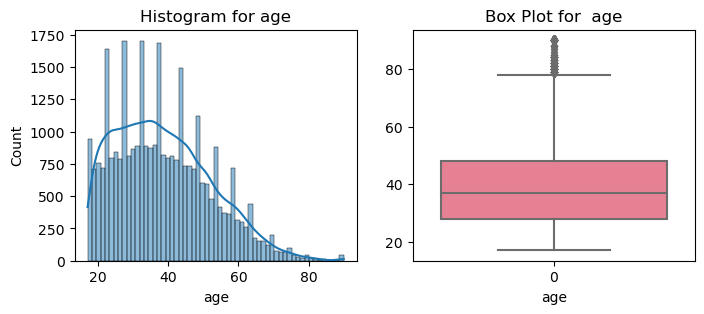

Skewness: 0.5587433694130484


In [6]:
plot_numerical_features(df,'age')
print("Skewness:",df["age"].skew()) 

/var/folders/2f/6f0g6s0s43z6djcqpkqh7nv40000gn/T/ipykernel_34979/1810534293.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = feature,kde = True, palette='husl')


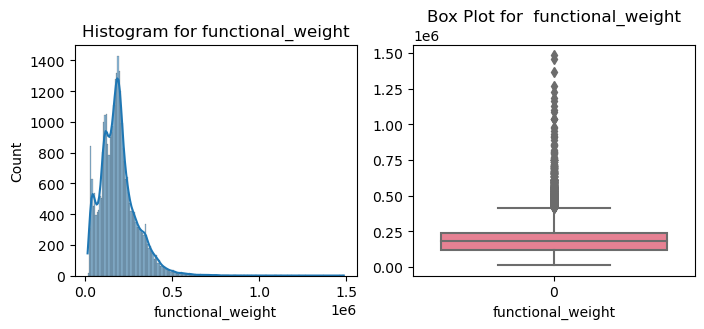

Skewness: 1.4469800945789828


In [7]:
plot_numerical_features(df,'functional_weight')
print("Skewness:",df["functional_weight"].skew()) 

/var/folders/2f/6f0g6s0s43z6djcqpkqh7nv40000gn/T/ipykernel_34979/1810534293.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = feature,kde = True, palette='husl')


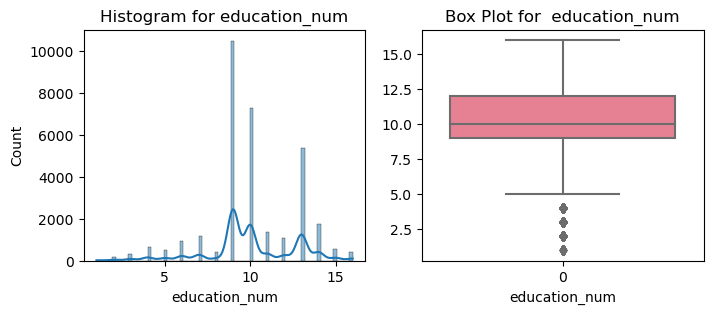

Skewness: -0.3116758679102295


In [8]:
plot_numerical_features(df,'education_num')
print("Skewness:",df["education_num"].skew()) 

/var/folders/2f/6f0g6s0s43z6djcqpkqh7nv40000gn/T/ipykernel_34979/1810534293.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = feature,kde = True, palette='husl')


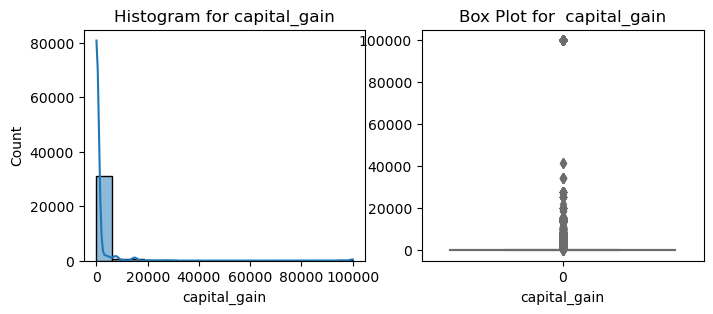

Skewness: 11.953847687699794


In [9]:
plot_numerical_features(df,'capital_gain')
print("Skewness:",df["capital_gain"].skew()) 

/var/folders/2f/6f0g6s0s43z6djcqpkqh7nv40000gn/T/ipykernel_34979/1810534293.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = feature,kde = True, palette='husl')


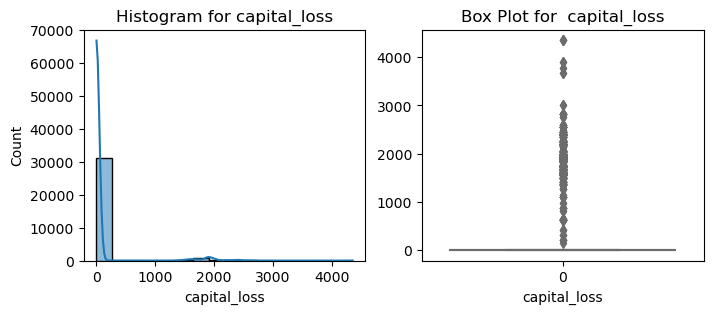

Skewness: 4.594629121679694


In [10]:
plot_numerical_features(df,'capital_loss')
print("Skewness:",df["capital_loss"].skew()) 

/var/folders/2f/6f0g6s0s43z6djcqpkqh7nv40000gn/T/ipykernel_34979/1810534293.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = feature,kde = True, palette='husl')


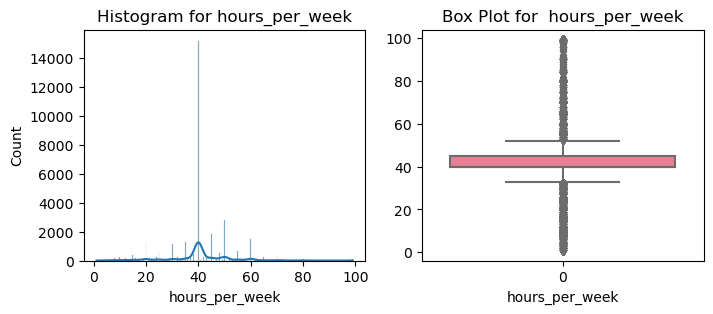

Skewness: 0.22764253680450108


In [11]:
plot_numerical_features(df,'hours_per_week')
print("Skewness:",df["hours_per_week"].skew()) 

In [ ]:
def plot_bar(df,feature):
    sns.countplot(x=df[feature], palette="Set2")
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Count in Each {}'.format(feature))
    plt.title('Bar Plot of {} Variable'.format(feature))


    # Show plot
    plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Summary statistics for continuous variables
continuous_vars = ['age', 'functional_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
continuous_summary = df[continuous_vars].describe()


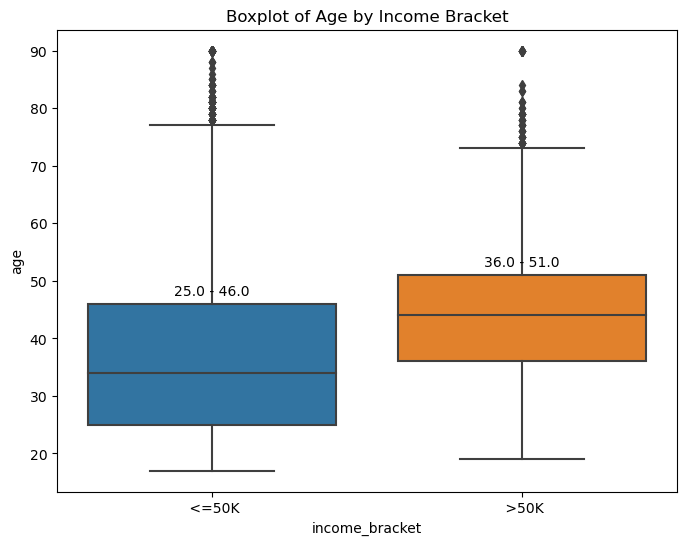

In [13]:
# Boxplot for 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='income_bracket', y='age', data=df)

# Calculate and display the range of age covered by each box
for i, income in enumerate(df['income_bracket'].unique()):
    income_data = df[df['income_bracket'] == income]['age']
    lower_quantile = income_data.quantile(0.25)
    upper_quantile = income_data.quantile(0.75)
    age_range = f'{lower_quantile} - {upper_quantile}'
    plt.text(i, upper_quantile + 1, age_range, ha='center', va='bottom')

plt.title('Boxplot of Age by Income Bracket')
plt.show()

The boxplot reveals that individuals earning less than or equal to 50k annually typically range from 25 to 46 years old, while those earning over 50k annually tend to fall between 36 to 51 years old. This suggests a slight age disparity between the two income brackets, with higher earners generally being older. The visualization provides a concise comparison of age distributions across income levels.

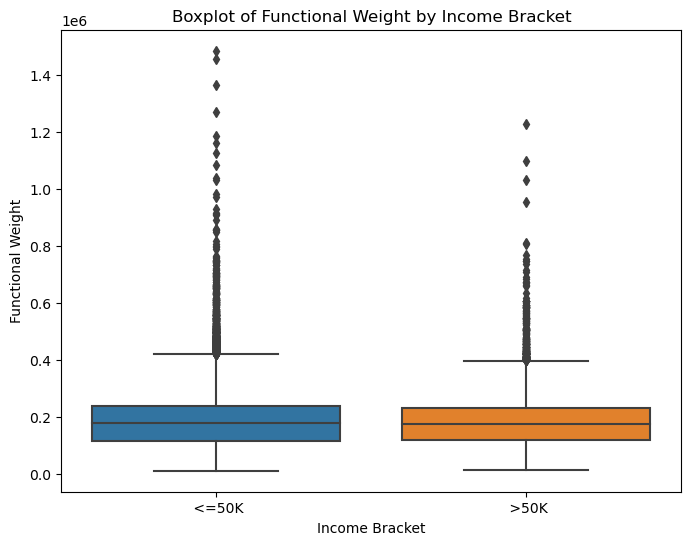

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'functional_weight'
plt.figure(figsize=(8, 6))
sns.boxplot(x='income_bracket', y='functional_weight', data=df)
plt.title('Boxplot of Functional Weight by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Functional Weight')
plt.show()


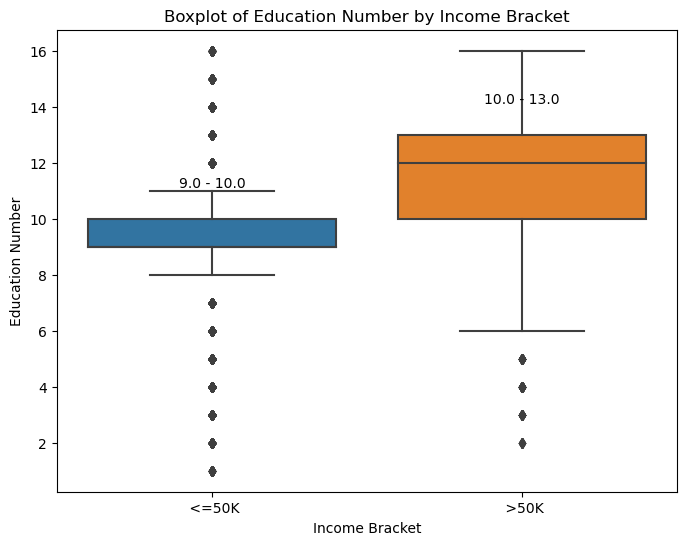

In [15]:
# Boxplot for 'education_num'
plt.figure(figsize=(8, 6))
sns.boxplot(x='income_bracket', y='education_num', data=df)

# Calculate and display the range of education_num covered by each box
for i, income in enumerate(df['income_bracket'].unique()):
    income_data = df[df['income_bracket'] == income]['education_num']
    lower_quantile = income_data.quantile(0.25)
    upper_quantile = income_data.quantile(0.75)
    education_range = f'{lower_quantile} - {upper_quantile}'
    plt.text(i, upper_quantile + 1, education_range, ha='center', va='bottom')

plt.title('Boxplot of Education Number by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Education Number')
plt.show()


In [16]:
# Filter the DataFrame for rows where 'education_num' is between 9 and 13
education_num_range = df[(df['education_num'] >= 9) & (df['education_num'] <= 13)]

# Create a dictionary with 'education_num' as keys and corresponding 'education' as values
education_dict = dict(zip(education_num_range['education_num'], education_num_range['education']))

# Display the key-value pairs
print("Key-Value Pairs for education numbers 9 to 13:")
for key, value in education_dict.items():
    print(f"{key}: {value}")


Key-Value Pairs for education numbers 9 to 13:
9:  HS-grad
11:  Assoc-voc
13:  Bachelors
12:  Assoc-acdm
10:  Some-college


Educational qualifications vary from High School Graduates (HS-grad) to Bachelor's degrees. Individuals with high-school degrees predominantly fall within the income bracket of <=50K, while those with bachelors, associate-vocation/academic tend to earn >50K. This highlights the correlation between education levels and income brackets in the dataset, emphasizing the importance of higher education for higher earnings.


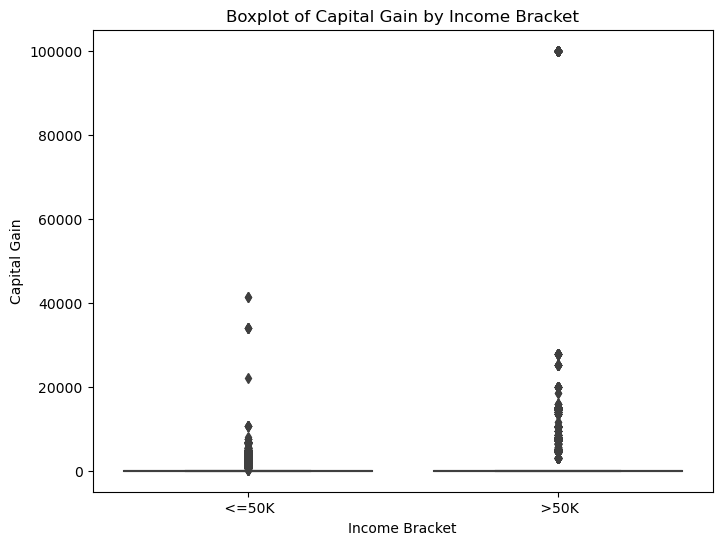

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'capital_gain' by income bracket (>50k vs. <=50k)
plt.figure(figsize=(8, 6))
sns.boxplot(x='income_bracket', y='capital_gain', data=df)
plt.title('Boxplot of Capital Gain by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Capital Gain')
plt.show()


The above plot shows that there is a positive relationship between income bracket and capital gain. The median capital gain for those in the income bracket >50k is higher than the median capital gain for those in the income bracket >=50k.

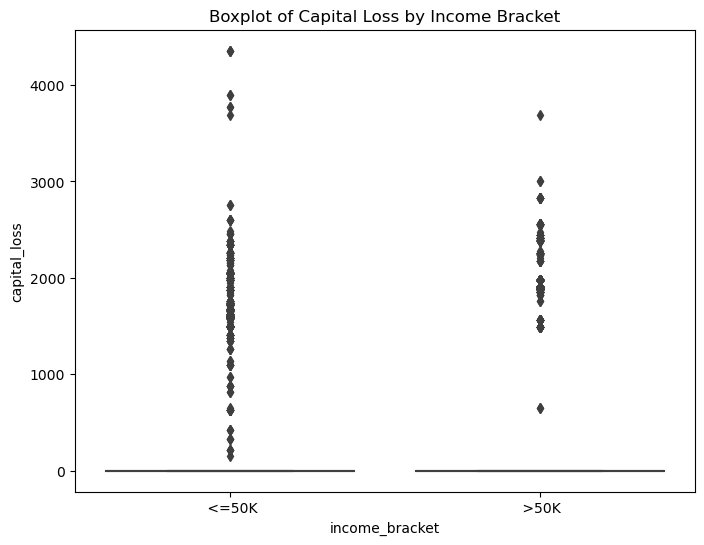

In [18]:
# Boxplot for 'capital_loss'
plt.figure(figsize=(8, 6))
sns.boxplot(x='income_bracket', y='capital_loss', data=df)
plt.title('Boxplot of Capital Loss by Income Bracket')
plt.show()


People with higher income (>$50,000) experienced smaller median capital losses compared to those with lower income. The spread of capital losses is wider for the lower income bracket, indicating greater variability in their losses. This boxplot only summarizes the data and cannot determine if the observed differences are statistically significant.

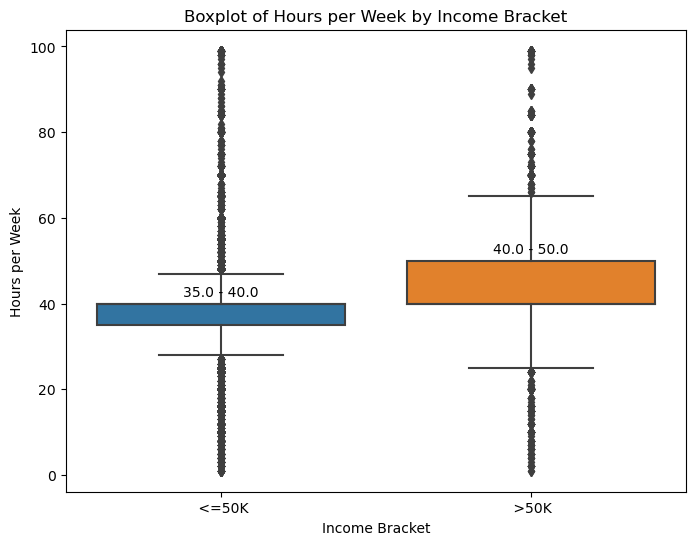

In [10]:
# Boxplot for 'hours_per_week'
plt.figure(figsize=(8, 6))
sns.boxplot(x='income_bracket', y='hours_per_week', data=df)

# Calculate and display the range of hours_per_week covered by each box
for i, income in enumerate(df['income_bracket'].unique()):
    income_data = df[df['income_bracket'] == income]['hours_per_week']
    lower_quantile = income_data.quantile(0.25)
    upper_quantile = income_data.quantile(0.75)
    hours_range = f'{lower_quantile} - {upper_quantile}'
    plt.text(i, upper_quantile + 1, hours_range, ha='center', va='bottom')

plt.title('Boxplot of Hours per Week by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Hours per Week')
plt.show()


## EDA of Categorical Variables

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_bar(df,feature):
    sns.countplot(x=df[feature], palette="Set2")
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Count in Each {}'.format(feature))
    plt.title('Bar Plot of {} Variable'.format(feature))


    # Show plot
    plt.show()

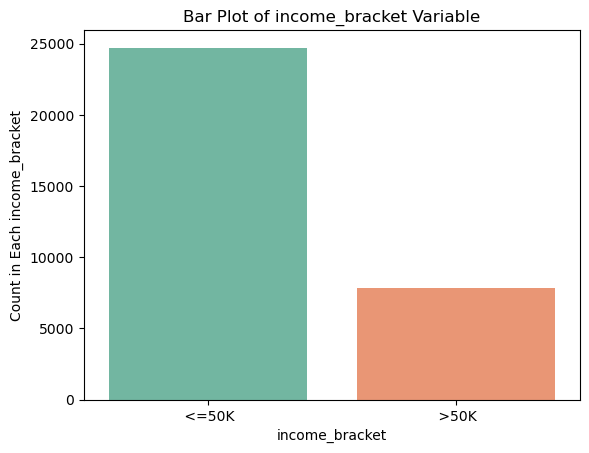

In [8]:
plot_bar(df,'income_bracket')

In [9]:
df['income_bracket'].value_counts()

 <=50K    24720
 >50K      7841
Name: income_bracket, dtype: int64

Within the boxplot for 'hours_per_week' categorized by income brackets:

Individuals earning <=50K typically work between 35 to 40 hours per week, as indicated by the lower quartile (Q1) and upper quartile (Q3).
Conversely, those earning >50K tend to work longer hours, with the majority falling within the range of 40 to 50 hours per week.
This suggests a positive correlation between income levels and the number of hours worked per week, with higher earners often dedicating more time to their work.

In [21]:
# Summary statistics for categorical variables
categorical_vars = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income_bracket']
categorical_summary = df[categorical_vars].describe()

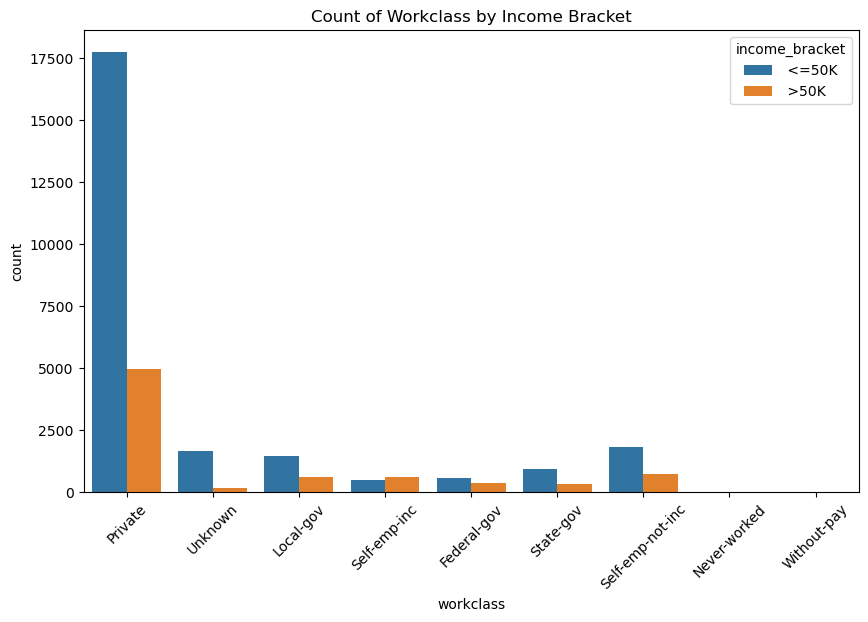

In [22]:
df['workclass'] = df['workclass'].str.strip()

# Replace "?" with a more appropriate label or treat it as a missing value
df['workclass'] = df['workclass'].mask(df['workclass'] == "?", "Unknown")

# Create the count plot for 'workclass' with the replaced label
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income_bracket', data=df)
plt.title('Count of Workclass by Income Bracket')
plt.xticks(rotation=45)
plt.show()



From the above graph, we can interpret that here are more workers in the income bracket of "<= 50K" than any other income bracket. The number of workers steadily decreases across the income brackets from "<= 50K" to "Without-pay". There are very few workers in the income brackets of "Self-emp-not-inc", "Never-worked", and "Without-pay".

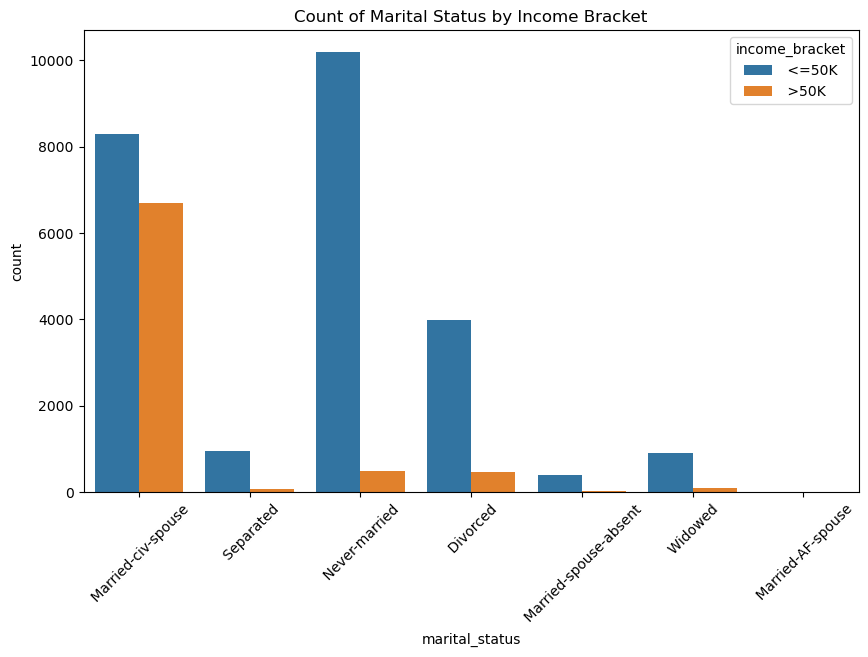

In [23]:
# Count plot for 'marital_status'
plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='income_bracket', data=df)
plt.title('Count of Marital Status by Income Bracket')
plt.xticks(rotation=45)
plt.show()


The number of married couples is highest in the income bracket of "<= 50K" and the number of married couples decreases across the income brackets from "<= 50K" to "> 100K". Also, there are very few married couples in the income bracket of "> 100K".

It's important to note that the graph doesn't show the scale on the y-axis, so it's difficult to say how many married couples are in each income bracket compared to the others. The graph also doesn't show any information about the total number of married couples or the percentage of married couples in each income bracket.

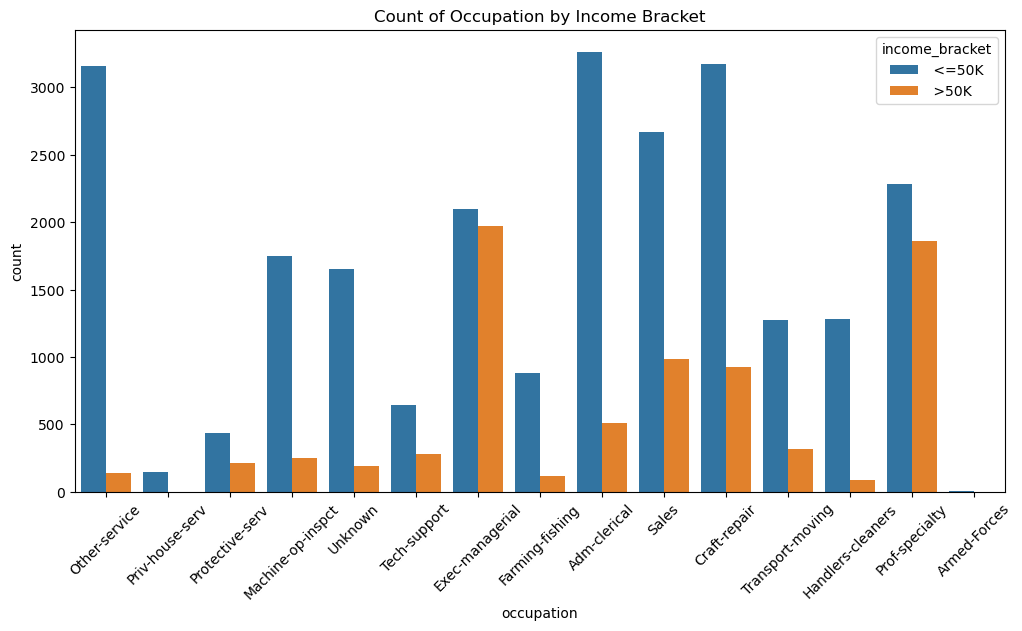

In [24]:
df['occupation'] = df['occupation'].str.strip()
df['occupation'] = df['occupation'].mask(df['occupation'] == "?", "Unknown")

# Create the count plot for 'occupation' with the replaced label
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', hue='income_bracket', data=df)
plt.title('Count of Occupation by Income Bracket')
plt.xticks(rotation=45)
plt.show()


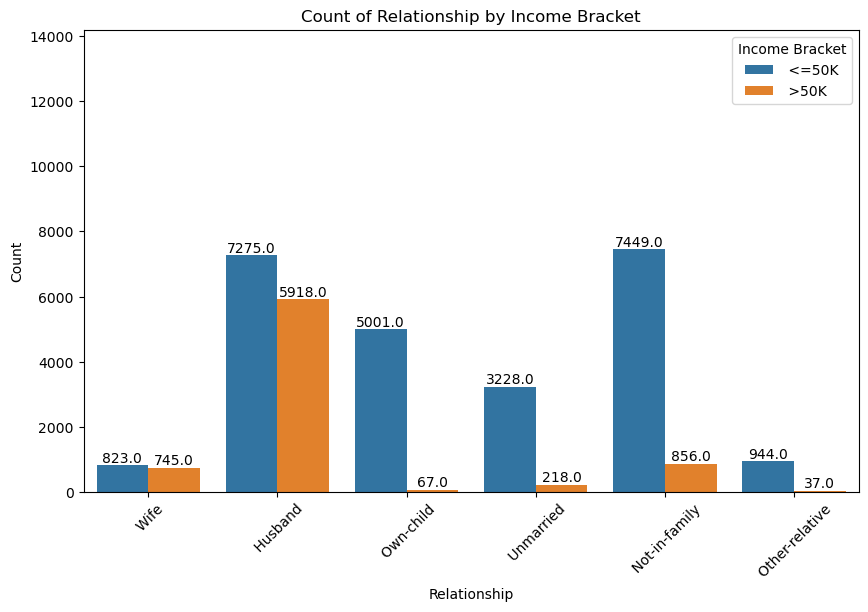

In [25]:
# Count plot for 'relationship' with income bracket hue
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='relationship', hue='income_bracket', data=df)

# Add annotations to display exact count or percentage of workers in each income bracket
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Adjust y-axis scale to better represent the data
ax.set_ylim(0, df['relationship'].value_counts().max() + 1000)

plt.title('Count of Relationship by Income Bracket')
plt.xticks(rotation=45)
plt.legend(title='Income Bracket')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.show()


Married couples are the most common relationship status across all income brackets.
The number of people in "Never Married" and "Unmarried" statuses increases across the income brackets from "<= 50K" to "> 100K".

It's important to note that the graph does not show the scale on the y-axis, so it's difficult to say exactly how many workers are in each income bracket compared to the others. The graph also doesn't show any information about the total number of workers or the percentage of workers in each income bracket.

In [18]:
def bivariate_analysis_scatter(df,feature1, feature2):
    plt.figure(figsize=(6,3))
    plt.scatter(df[feature1], df[feature2],c=df['income_bracket'],cmap='viridis')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Scatter Plot of {} vs. {}'.format(feature1, feature2))

Text(0.5, 1.0, 'Capital Gain by Age and Income Bracket')

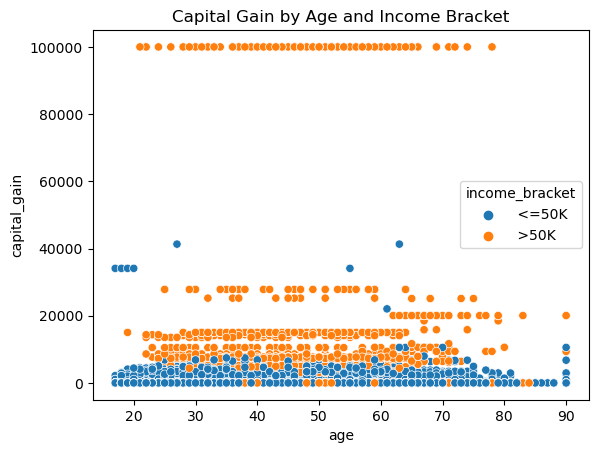

In [23]:
#bivariate_analysis_scatter(df,'age', 'capital_gain')
ax = sns.scatterplot(x='age', y='capital_gain', data=df, hue='income_bracket')
ax.set_title("Capital Gain by Age and Income Bracket")

## Data Cleaning

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32561 non-null  int64 
 1   workclass          32561 non-null  object
 2   functional_weight  32561 non-null  int64 
 3   education          32561 non-null  object
 4   education_num      32561 non-null  int64 
 5   marital_status     32561 non-null  object
 6   occupation         32561 non-null  object
 7   relationship       32561 non-null  object
 8   race               32561 non-null  object
 9   sex                32561 non-null  object
 10  capital_gain       32561 non-null  int64 
 11  capital_loss       32561 non-null  int64 
 12  hours_per_week     32561 non-null  int64 
 13  native_country     32561 non-null  object
 14  income_bracket     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
import numpy as np
df.replace(' ?', np.nan, inplace=True)
df

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,Private,199316,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
32557,45,Private,81132,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
32558,32,Private,288229,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
32559,30,Self-emp-not-inc,257295,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32561 non-null  int64 
 1   workclass          32561 non-null  object
 2   functional_weight  32561 non-null  int64 
 3   education          32561 non-null  object
 4   education_num      32561 non-null  int64 
 5   marital_status     32561 non-null  object
 6   occupation         32561 non-null  object
 7   relationship       32561 non-null  object
 8   race               32561 non-null  object
 9   sex                32561 non-null  object
 10  capital_gain       32561 non-null  int64 
 11  capital_loss       32561 non-null  int64 
 12  hours_per_week     32561 non-null  int64 
 13  native_country     31978 non-null  object
 14  income_bracket     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [29]:
# Checking the missing values for the features again
round(100*(df.isnull().sum()/len(df.index)), 2)

age                  0.00
workclass            0.00
functional_weight    0.00
education            0.00
education_num        0.00
marital_status       0.00
occupation           0.00
relationship         0.00
race                 0.00
sex                  0.00
capital_gain         0.00
capital_loss         0.00
hours_per_week       0.00
native_country       1.79
income_bracket       0.00
dtype: float64

Now see native_country has some null values . Rest of the columns dont have any null values .

In [30]:
mode_country = df['native_country'].mode()[0]  # Find the mode
df['native_country'].fillna(mode_country, inplace=True)

df

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,Private,199316,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
32557,45,Private,81132,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
32558,32,Private,288229,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
32559,30,Self-emp-not-inc,257295,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32561 non-null  int64 
 1   workclass          32561 non-null  object
 2   functional_weight  32561 non-null  int64 
 3   education          32561 non-null  object
 4   education_num      32561 non-null  int64 
 5   marital_status     32561 non-null  object
 6   occupation         32561 non-null  object
 7   relationship       32561 non-null  object
 8   race               32561 non-null  object
 9   sex                32561 non-null  object
 10  capital_gain       32561 non-null  int64 
 11  capital_loss       32561 non-null  int64 
 12  hours_per_week     32561 non-null  int64 
 13  native_country     32561 non-null  object
 14  income_bracket     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
duplicate = df[df.duplicated()]
duplicate

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
3190,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
3191,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
3493,23,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55,Mexico,<=50K
3702,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5779,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
6531,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
6681,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
11921,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
12811,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
13272,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [33]:
# dropping the duplicate rows 
df = df.drop_duplicates()

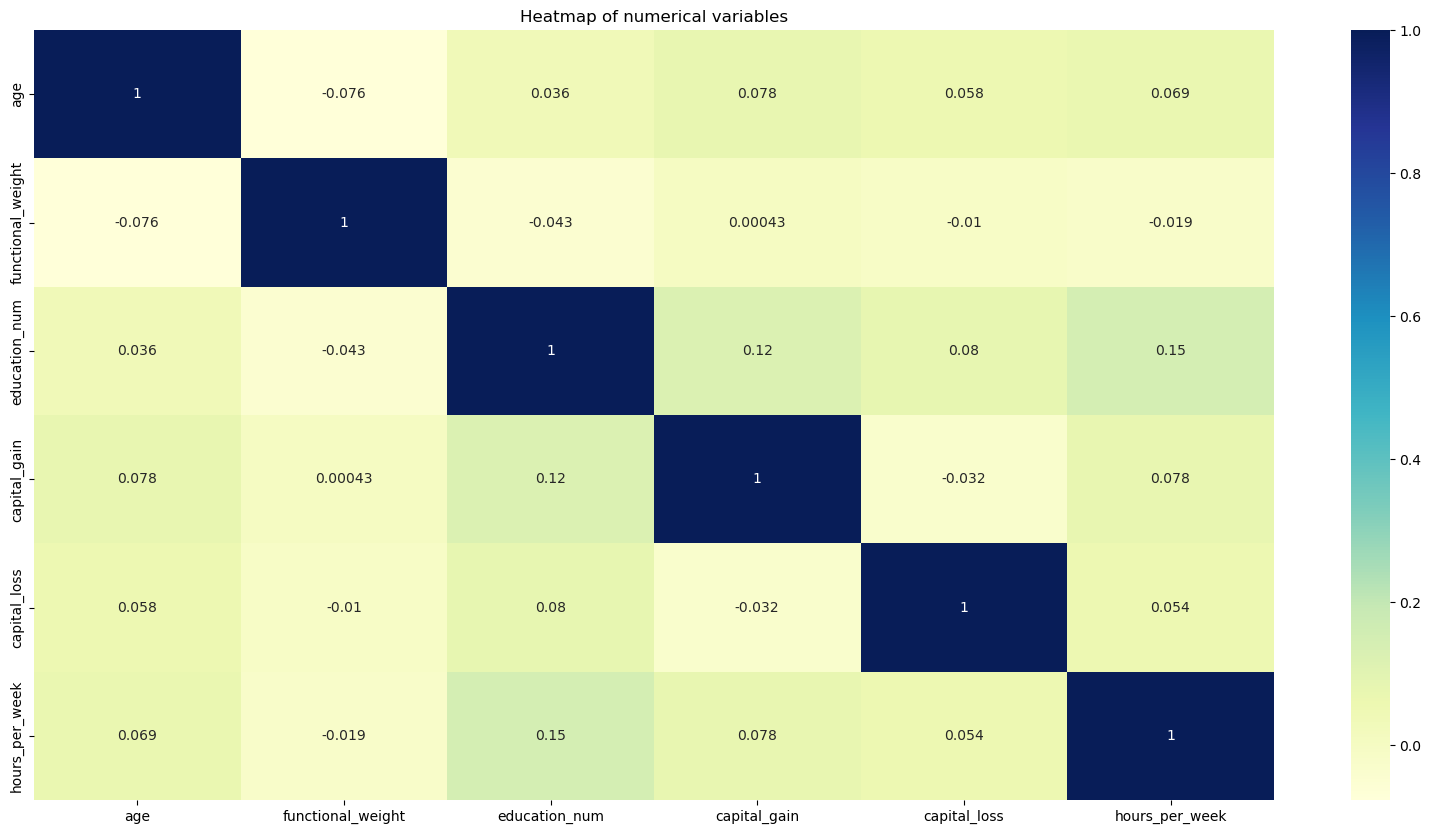

In [34]:
co = df[numeric_features]
plt.figure(figsize=(20, 10))
sns.heatmap(co.corr(), annot = True, cmap="YlGnBu")
plt.title('Heatmap of numerical variables')
plt.show()

There is no strong correlation between numeric features . So there is no multicollinearity among the features.

Education Level as Ordinal:

There's a natural order to education levels (e.g., HS diploma typically comes before a Bachelor's degree).
We are assuming the relationship between education level and the target variable is likely to be monotonic (i.e., higher education levels consistently correspond to a higher or lower probability of the target event), then label encoding could be appropriate.

Nominal Categorical Variables -'workclass','marital_status','occupation','relationship','race','sex','native_country'

We will be performing one hot encoding on the nominal categorical features and label encoding on ordinal features.

In [35]:
df

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,Private,199316,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
32557,45,Private,81132,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
32558,32,Private,288229,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
32559,30,Self-emp-not-inc,257295,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K


In [36]:
# one hot encoding for converting the categorical variable to numerical
df = pd.get_dummies(df, columns=['workclass','marital_status','occupation','relationship','race','sex'], drop_first=True)
df

,age,functional_weight,education,education_num,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,workclass_Local-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,297847,9th,5,3411,0,34,United-States,<=50K,False,...,False,False,False,False,True,False,True,False,False,False
1,77,344425,9th,5,0,0,10,United-States,<=50K,False,...,False,False,False,False,True,False,True,False,False,False
2,38,131461,9th,5,0,0,24,Haiti,<=50K,False,...,False,False,False,False,True,False,True,False,False,False
3,28,190350,9th,5,0,0,40,United-States,<=50K,False,...,False,False,False,False,True,False,True,False,False,False
4,37,171090,9th,5,0,0,48,United-States,<=50K,False,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,199316,Some-college,10,0,0,40,India,<=50K,False,...,False,True,False,False,False,True,False,False,False,True
32557,45,81132,Some-college,10,0,0,40,Philippines,<=50K,False,...,False,True,False,False,False,True,False,False,False,True
32558,32,288229,Some-college,10,0,0,40,Greece,<=50K,False,...,False,True,False,False,False,True,False,False,False,False
32559,30,257295,Some-college,10,0,2258,40,South,<=50K,False,...,False,True,False,False,False,True,False,False,False,True


In [37]:
from sklearn.preprocessing import LabelEncoder
# Label encoding the target variable
le = LabelEncoder()
df['income_bracket'] = le.fit_transform(df['income_bracket'])
df

,age,functional_weight,education,education_num,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,workclass_Local-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,297847,9th,5,3411,0,34,United-States,0,False,...,False,False,False,False,True,False,True,False,False,False
1,77,344425,9th,5,0,0,10,United-States,0,False,...,False,False,False,False,True,False,True,False,False,False
2,38,131461,9th,5,0,0,24,Haiti,0,False,...,False,False,False,False,True,False,True,False,False,False
3,28,190350,9th,5,0,0,40,United-States,0,False,...,False,False,False,False,True,False,True,False,False,False
4,37,171090,9th,5,0,0,48,United-States,0,False,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,199316,Some-college,10,0,0,40,India,0,False,...,False,True,False,False,False,True,False,False,False,True
32557,45,81132,Some-college,10,0,0,40,Philippines,0,False,...,False,True,False,False,False,True,False,False,False,True
32558,32,288229,Some-college,10,0,0,40,Greece,0,False,...,False,True,False,False,False,True,False,False,False,False
32559,30,257295,Some-college,10,0,2258,40,South,0,False,...,False,True,False,False,False,True,False,False,False,True


In [38]:
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df

,age,functional_weight,education,education_num,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,workclass_Local-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,297847,6,5,3411,0,34,United-States,0,False,...,False,False,False,False,True,False,True,False,False,False
1,77,344425,6,5,0,0,10,United-States,0,False,...,False,False,False,False,True,False,True,False,False,False
2,38,131461,6,5,0,0,24,Haiti,0,False,...,False,False,False,False,True,False,True,False,False,False
3,28,190350,6,5,0,0,40,United-States,0,False,...,False,False,False,False,True,False,True,False,False,False
4,37,171090,6,5,0,0,48,United-States,0,False,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,199316,15,10,0,0,40,India,0,False,...,False,True,False,False,False,True,False,False,False,True
32557,45,81132,15,10,0,0,40,Philippines,0,False,...,False,True,False,False,False,True,False,False,False,True
32558,32,288229,15,10,0,0,40,Greece,0,False,...,False,True,False,False,False,True,False,False,False,False
32559,30,257295,15,10,0,2258,40,South,0,False,...,False,True,False,False,False,True,False,False,False,True


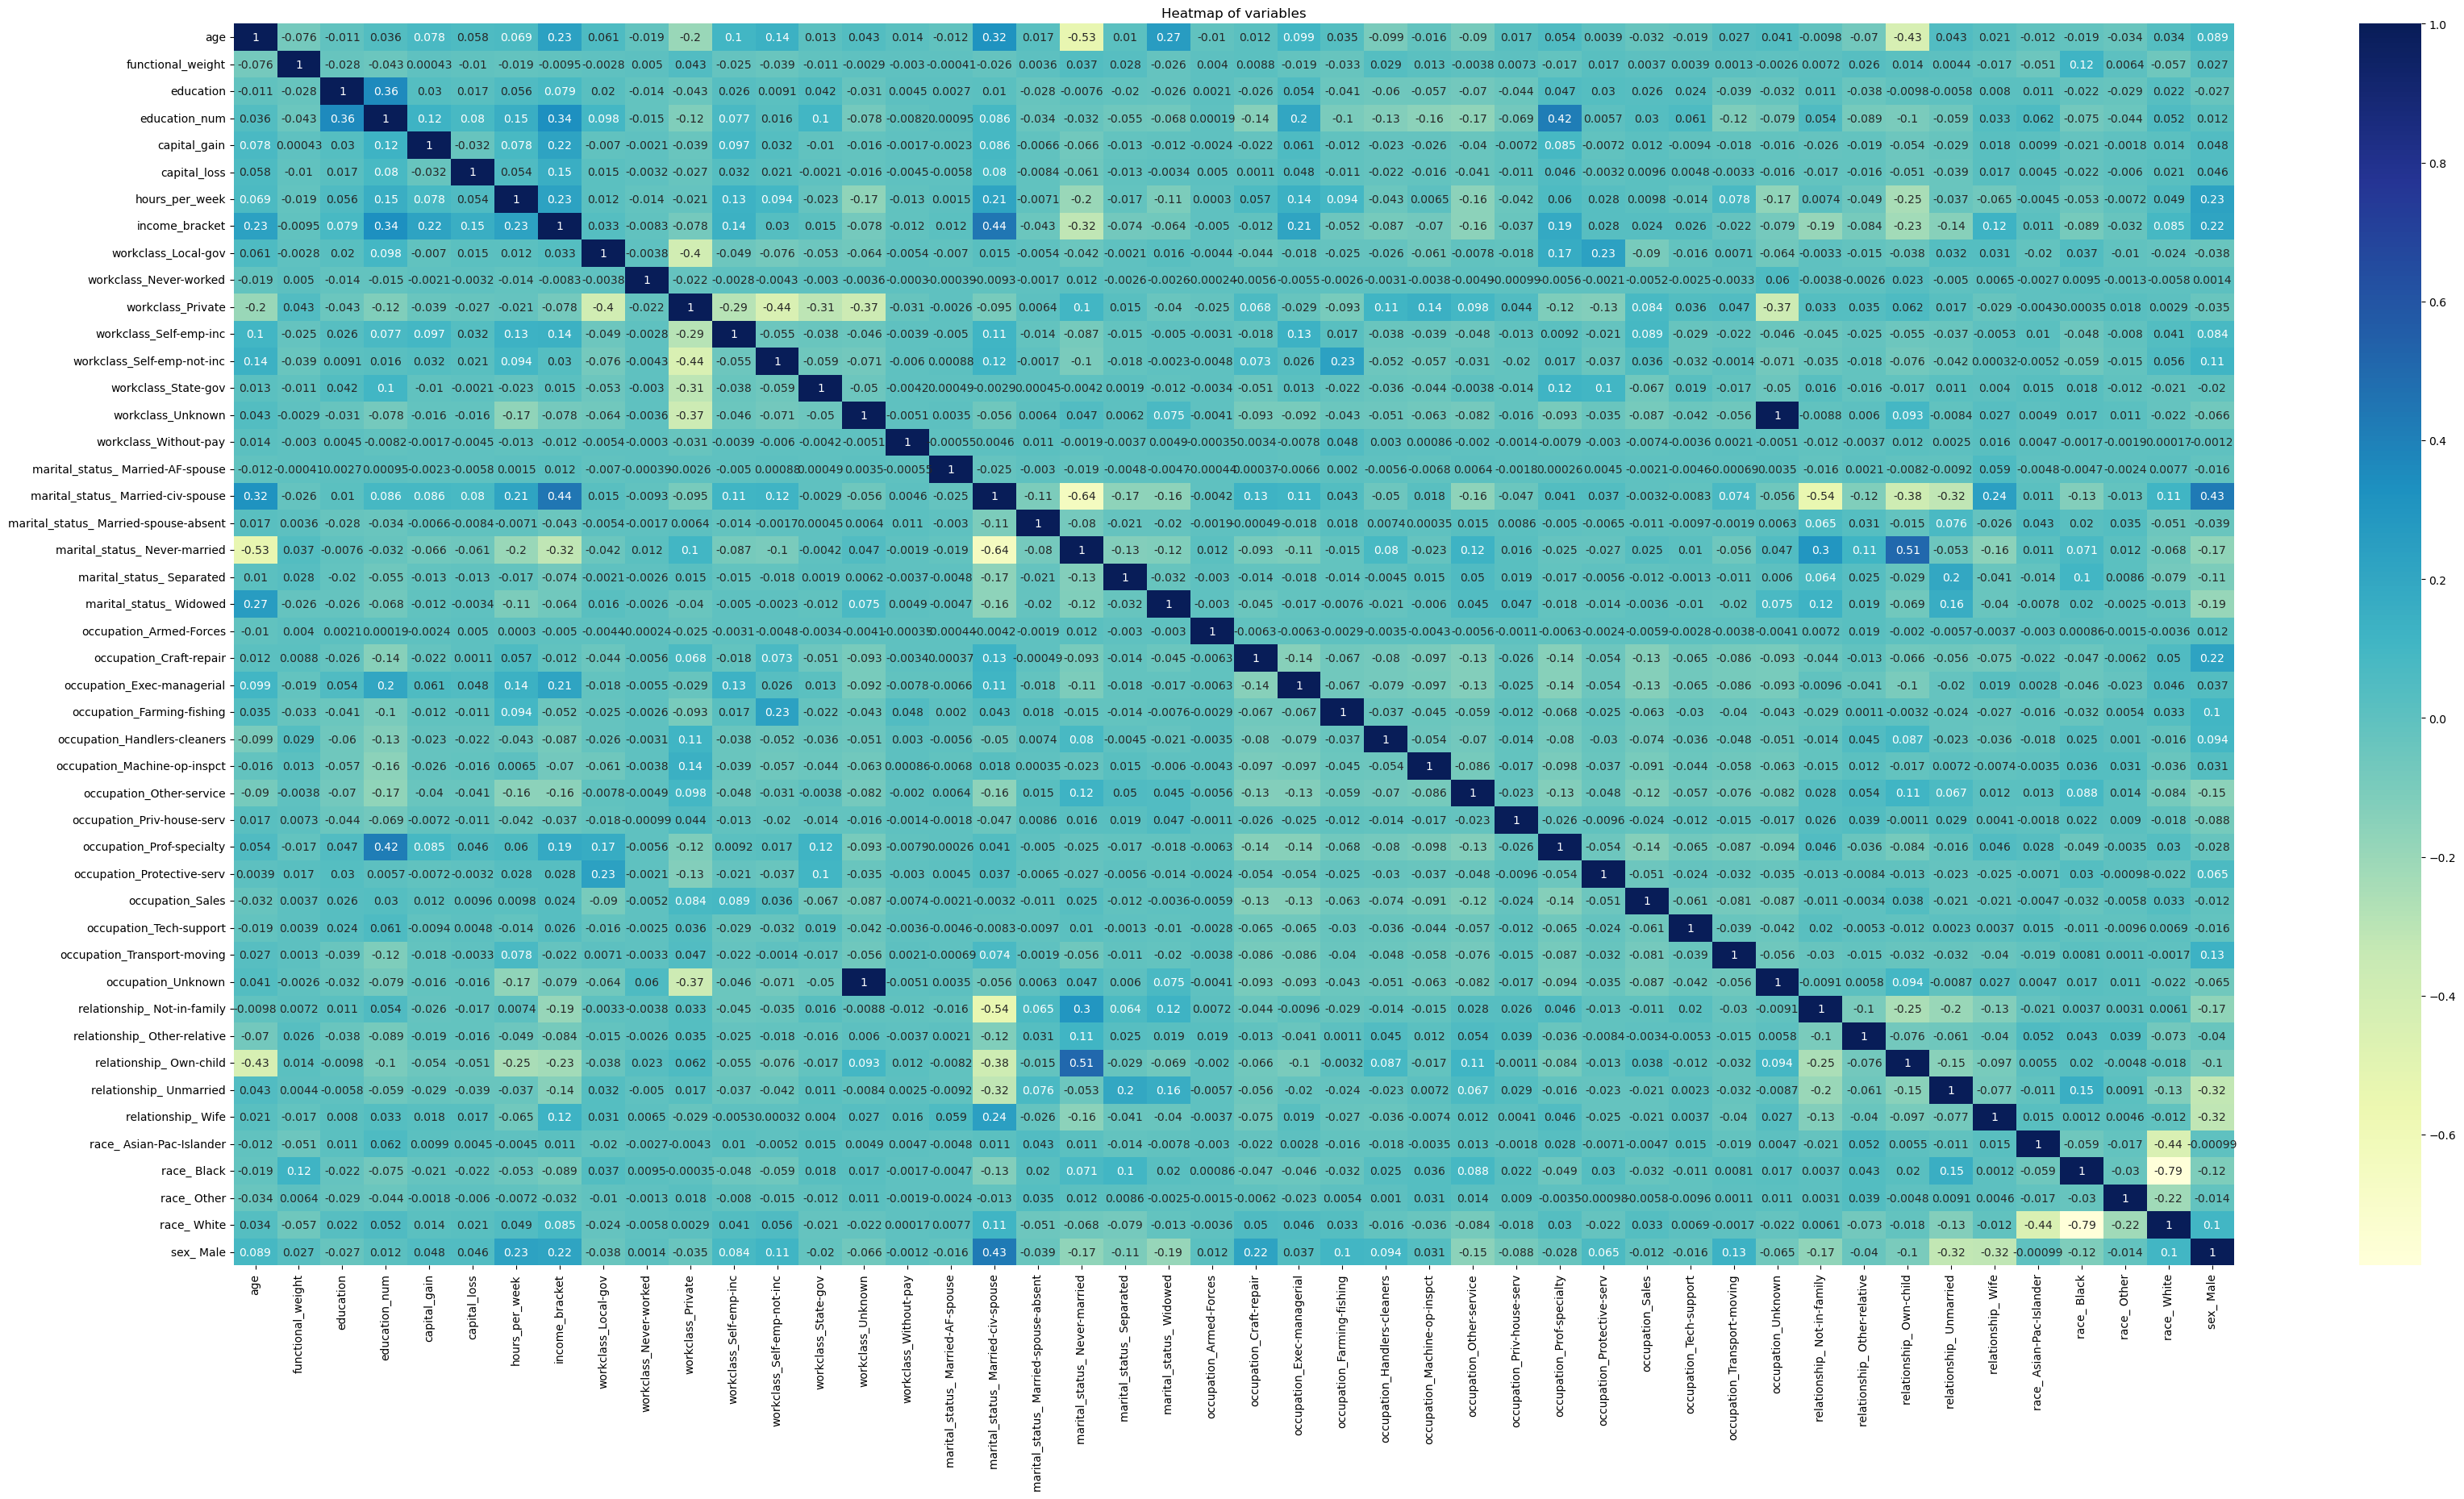

In [39]:
features_exclude_country = [item for item in df.columns if item != 'native_country' ]
co = df[features_exclude_country]
plt.figure(figsize=(40, 20))
sns.heatmap(co.corr(), annot = True, cmap="YlGnBu")
plt.title('Heatmap of variables')
plt.show()

This correlation matrix looks untidy . After zooming in we found out the following details

Features with High Correlation with Target - 'marital_status_ Married-civ-spouse', 'education_num'
Multicollinear features - 'workclass_Unknown'and 'occupation_Unknown'

We do see the null error rate is approximately 75% . So if our model does not have accuracy greater than that it would not be considered a good model.

## Logistic Regression Modelling

In [40]:
def calculate_metrics(y_train,y_predict):
    # calculates the accuracy of the model's predictions on the training data
    acc = accuracy_score(y_train, y_predict)
    # creates a confusion matrix, which provides a detailed breakdown of the model's performance.
    conf_matrix = confusion_matrix(y_train, y_predict)
    # generates a classification report, which provides additional metrics such as precision, recall, F1-score, 
    # and support for each class.
    report = classification_report(y_train, y_predict)

    print(f"Accuracy: {acc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{report}")

#### Logistic Regression Model 1

In [41]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [42]:
# Spltting Dataset into Train and Test for model 1
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(df[numeric_features], df['income_bracket'], train_size=0.7, random_state=42)

In [43]:
X_train_m1.head()

,age,functional_weight,education_num,capital_gain,capital_loss,hours_per_week
1216,38,53930,6,0,0,40
27958,42,170649,10,0,0,60
23077,33,202642,13,0,0,40
19682,38,36989,13,3908,0,70
19184,28,259840,13,0,0,60


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# Training model 1
logreg_m1 = LogisticRegression()
logreg_m1.fit(X_train_m1, y_train_m1)

LogisticRegression()

In [45]:
#  uses the trained Logistic Regression model to make predictions on the training data
y_predict_m1_train = logreg_m1.predict(X_train_m1)

In [46]:
# accesses the coef_ attribute of the trained Logistic Regression model. 
# This attribute holds an array containing the estimated coefficients for the model.
logreg_m1.coef_

array([[-4.39074131e-03, -3.87825928e-06, -2.38934497e-03,
         3.30908572e-04,  7.83591716e-04, -9.66011658e-03]])

In [47]:
# calculates the accuracy of the model's predictions on the training data
acc = accuracy_score(y_train_m1, y_predict_m1_train)
# creates a confusion matrix, which provides a detailed breakdown of the model's performance.
conf_matrix = confusion_matrix(y_train_m1, y_predict_m1_train)
# generates a classification report, which provides additional metrics such as precision, recall, F1-score, 
# and support for each class.
report = classification_report(y_train_m1, y_predict_m1_train)

print(f"Accuracy: {acc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 0.797277716794731
Confusion Matrix:
[[16681   573]
 [ 4044  1477]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     17254
           1       0.72      0.27      0.39      5521

    accuracy                           0.80     22775
   macro avg       0.76      0.62      0.63     22775
weighted avg       0.78      0.80      0.76     22775



#### Logistic Regression Model 2

In [48]:
features2 =  [item for item in co.columns if item != 'workclass_Unknown' and item!= 'income_bracket' ]
features2

['age',
 'functional_weight',
 'education',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'occupation_Unknown',
 'relationship_ Not-in-family',
 'relationship_ Other-relative',
 'relationship_ Own

In [49]:
# Spltting Dataset into Train and Test for model 1
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(df[features2], df['income_bracket'], train_size=0.7, random_state=42)

In [50]:
X_train_m2.head()

,age,functional_weight,education,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
1216,38,53930,0,6,0,0,40,False,False,True,...,True,False,False,False,False,False,True,False,False,True
27958,42,170649,15,10,0,0,60,False,False,False,...,False,False,False,False,False,False,False,False,True,True
23077,33,202642,9,13,0,0,40,False,False,True,...,False,True,False,False,False,False,True,False,False,False
19682,38,36989,9,13,3908,0,70,False,False,True,...,False,False,False,False,False,False,False,False,True,True
19184,28,259840,9,13,0,0,60,False,False,True,...,False,False,False,False,False,False,False,False,True,True


In [51]:
# Training model 2
logreg_m2 = LogisticRegression()
logreg_m2.fit(X_train_m2, y_train_m2)

LogisticRegression()

In [52]:
#  uses the trained Logistic Regression model to make predictions on the training data
y_predict_m2_train = logreg_m2.predict(X_train_m2)

In [53]:
# accesses the coef_ attribute of the trained Logistic Regression model. 
# This attribute holds an array containing the estimated coefficients for the model.
logreg_m2.coef_

array([[-6.79363112e-03, -3.78040574e-06, -2.92156130e-03,
        -1.60201878e-03,  3.32061503e-04,  7.87175884e-04,
        -7.41449445e-03, -3.34909977e-06, -2.76047314e-07,
        -3.02158949e-04,  3.73813428e-05, -1.96847960e-05,
        -8.62922696e-06, -9.40790200e-07,  5.08218036e-07,
         3.82479441e-04, -1.51142984e-05, -4.70325308e-04,
        -3.78496436e-05, -4.05721565e-05, -2.46904523e-07,
        -4.68815341e-05,  1.18046028e-04, -4.00208145e-05,
        -4.81310658e-05, -5.65635940e-05, -1.45617044e-04,
        -7.37491030e-06,  8.02161226e-05,  7.64107479e-06,
        -1.72830804e-05,  3.87795852e-06, -2.48166424e-05,
        -6.34769586e-05, -2.99568392e-04, -4.10112471e-05,
        -2.48923344e-04, -1.43329211e-04,  4.55003715e-05,
        -8.20478458e-06, -7.49072462e-05, -7.81211222e-06,
        -2.38823004e-04,  2.77187668e-05]])

In [54]:
# calculates the accuracy of the model's predictions on the training data
acc = accuracy_score(y_train_m2, y_predict_m2_train)
# creates a confusion matrix, which provides a detailed breakdown of the model's performance.
conf_matrix = confusion_matrix(y_train_m2, y_predict_m2_train)
# generates a classification report, which provides additional metrics such as precision, recall, F1-score, 
# and support for each class.
report = classification_report(y_train_m2, y_predict_m2_train)

print(f"Accuracy: {acc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7975411635565313
Confusion Matrix:
[[16681   573]
 [ 4038  1483]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17254
           1       0.72      0.27      0.39      5521

    accuracy                           0.80     22775
   macro avg       0.76      0.62      0.64     22775
weighted avg       0.78      0.80      0.76     22775



## Random Forest Modelling 

#### Random Forest Model 1

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'max_features': [2, 3, 4],
}

# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Instantiate the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train_m1, y_train_m1)

# Access the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'max_features': 4, 'n_estimators': 50}


In [56]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=10, max_features=4, random_state=25, oob_score=True)
rf1.fit(X_train_m1, y_train_m1)

y_predict_rf_m1_train = rf1.predict(X_train_m1)

calculate_metrics(y_train_m1,y_predict_rf_m1_train)

Accuracy: 0.8498353457738749
Confusion Matrix:
[[16712   542]
 [ 2878  2643]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     17254
           1       0.83      0.48      0.61      5521

    accuracy                           0.85     22775
   macro avg       0.84      0.72      0.76     22775
weighted avg       0.85      0.85      0.83     22775



#### Random Forest Model 2

In [57]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_m2, y_train_m2)

# Retrieve feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Select the top N features
top_n = 8
selected_features = X_train_m2.columns[indices[:top_n]]

In [58]:
selected_features

Index(['functional_weight', 'age', 'capital_gain', 'hours_per_week',
       'marital_status_ Married-civ-spouse', 'education_num', 'education',
       'capital_loss'],
      dtype='object')

In [59]:
columns_m2 = ['functional_weight', 'age', 'capital_gain', 'hours_per_week',
       'marital_status_ Married-civ-spouse', 'education_num', 'education',
       'capital_loss']

X_train_rf_2 = X_train_m2[columns_m2]
X_test_rf_2 = X_test_m2[columns_m2]

In [61]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'max_features': [2, 3, 4],
}

# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Instantiate the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train_rf_2, y_train_m2)

# Access the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'max_features': 4, 'n_estimators': 200}


In [64]:
rf2 = RandomForestClassifier(n_estimators=200, max_depth=10, max_features=4, random_state=25, oob_score=True)
rf2.fit(X_train_rf_2, y_train_m2)

y_predict_rf_m2_train = rf2.predict(X_train_rf_2)

calculate_metrics(y_train_m2,y_predict_rf_m2_train)

Accuracy: 0.8711745334796926
Confusion Matrix:
[[16431   823]
 [ 2111  3410]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     17254
           1       0.81      0.62      0.70      5521

    accuracy                           0.87     22775
   macro avg       0.85      0.78      0.81     22775
weighted avg       0.87      0.87      0.86     22775



### Testing the  models on unseen data

In [68]:
y_predict_m1_lr_test = logreg_m1.predict(X_test_m1)
calculate_metrics(y_test_m1, y_predict_m1_lr_test)

Accuracy: 0.7979922147101004
Confusion Matrix:
[[7207  237]
 [1735  583]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7444
           1       0.71      0.25      0.37      2318

    accuracy                           0.80      9762
   macro avg       0.76      0.61      0.63      9762
weighted avg       0.78      0.80      0.76      9762



In [66]:
y_predict_m2_rf_test = rf2.predict(X_test_rf_2)
calculate_metrics(y_test_m2, y_predict_m2_rf_test)

Accuracy: 0.8616062282319197
Confusion Matrix:
[[7023  421]
 [ 930 1388]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7444
           1       0.77      0.60      0.67      2318

    accuracy                           0.86      9762
   macro avg       0.83      0.77      0.79      9762
weighted avg       0.86      0.86      0.86      9762



<table border="1" cellspacing="0" cellpadding="5">
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1 Score</th>
  </tr>
     <tr>
    <td>Logistic Regression Model 1</td>
    <td>0.8</td>
    <td>0.76</td>
    <td>0.62</td>
    <td>0.63</td>
  </tr>
  <tr>
    <td>Logistic Regression Model 2</td>
    <td>0.8</td>
    <td>0.76</td>
    <td>0.62</td>
    <td>0.64</td>
  </tr>
  <tr>
    <td>Random Forest Model 1</td>
    <td>0.84</td>
    <td>0.84</td>
    <td>0.72</td>
    <td>0.76</td>
  </tr>
  <tr>
    <td>Random Forest Model 2</td>
    <td>0.87</td>
    <td>0.85</td>
    <td>0.78</td>
    <td>0.81</td>
	</tr>
  <tr>
    <td>Logistic Regression Model 1 Testing</td>
    <td>0.8</td>
    <td>0.76</td>
    <td>0.61</td>
    <td>0.63</td>
	</tr>
    <tr>
    <td>Random Forest Model 2 Testing</td>
    <td>0.86</td>
    <td>0.83</td>
    <td>0.77</td>
    <td>0.79</td>
	</tr>
  <table>

## Conclusion

In conclusion, this study successfully investigated the determinants of adult income in the United States using anonymized census data. By leveraging a diverse set of demographic features and machine learning models built with Python libraries, the analysis yielded valuable insights into the factors influencing income levels.

Machine learning models, particularly Random Forest Model 2, achieved promising performance with an accuracy of 0.87, indicating a strong ability to distinguish between income brackets. This suggests that the chosen features and the model effectively captured significant relationships between income and demographic factors.

Analysis of feature importance within the Random Forest Model 2 revealed that factors such as work experience (functional_weight), age, capital gains, hours worked per week, marital status (married), educational attainment (education_num and education), and even capital losses all play a significant role in influencing income levels in the US. This aligns with prior research highlighting the importance of human capital, labor market participation, and financial windfalls for economic success.

Future exploration could delve deeper into how these specific features interact with each other. For instance, does the effect of education on income vary depending on marital status?  A deeper understanding of these relationships can provide even more targeted insights for policymakers.

Additionally, incorporating income data with a finer granularity beyond the $50,000 threshold could allow for a more nuanced understanding of the income distribution. This would necessitate adjusting the model's target variable and potentially exploring regression-based approaches.

Overall, this project establishes a robust foundation for further investigation into the complexities of income distribution in the United States. By delving deeper into feature importance, exploring interaction effects, and considering finer income categories, future research can provide even more comprehensive insights to guide socioeconomic policy and interventions.